In [1]:
# import packages 
import pandas as pd
import numpy as np
import glob
import json

# Import visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Pretty display for notebooks
%matplotlib inline

In [2]:
def load_kickstarter_data(datapath):
    '''datapath = location of csv files to be loaded'''
    # List with the names of all the csv files in the path
    csv_files = glob.glob(datapath+'/*.csv')

    print(f'Total files: {len(csv_files)}')

    # Loop through the files
    for file_idx, csv_file in enumerate(csv_files): 
        # create dataframe from 1st csv       
        if file_idx == 0:
            df_ks = pd.read_csv(csv_file)
            print(f'File number {file_idx + 1} added to dataframe')
        else:
            # create dataframe from idx csv
            df = pd.read_csv(csv_file)
            # check files are all in same
            if  np.all(df.columns == df_ks.columns) == False:
                print(f'Column format of {csv_file} does not match {csv_files[0]}. Please check and try again')
                return
            else:
                # append to initial dataframe                   
                df_ks = pd.concat([df_ks, df], axis=0, ignore_index=True)       
                print(f'File number {file_idx + 1} added to dataframe')
    print('File import done')
    return df_ks

In [3]:
df = load_kickstarter_data('kickstarter/data')

Total files: 56
File number 1 added to dataframe
File number 2 added to dataframe
File number 3 added to dataframe
File number 4 added to dataframe
File number 5 added to dataframe
File number 6 added to dataframe
File number 7 added to dataframe
File number 8 added to dataframe
File number 9 added to dataframe
File number 10 added to dataframe
File number 11 added to dataframe
File number 12 added to dataframe
File number 13 added to dataframe
File number 14 added to dataframe
File number 15 added to dataframe
File number 16 added to dataframe
File number 17 added to dataframe
File number 18 added to dataframe
File number 19 added to dataframe
File number 20 added to dataframe
File number 21 added to dataframe
File number 22 added to dataframe
File number 23 added to dataframe
File number 24 added to dataframe
File number 25 added to dataframe
File number 26 added to dataframe
File number 27 added to dataframe
File number 28 added to dataframe
File number 29 added to dataframe
File nu

In [4]:
df.columns

Index(['backers_count', 'blurb', 'category', 'converted_pledged_amount',
       'country', 'created_at', 'creator', 'currency', 'currency_symbol',
       'currency_trailing_code', 'current_currency', 'deadline',
       'disable_communication', 'friends', 'fx_rate', 'goal', 'id',
       'is_backing', 'is_starrable', 'is_starred', 'launched_at', 'location',
       'name', 'permissions', 'photo', 'pledged', 'profile', 'slug',
       'source_url', 'spotlight', 'staff_pick', 'state', 'state_changed_at',
       'static_usd_rate', 'urls', 'usd_pledged', 'usd_type'],
      dtype='object')

In [5]:
def extract_json_data(data):
    ''' This function extracts specific sub fields from json files embedded in columns of a dataframe
        data: dataframe containing column with json data'''
    data['category_name'] = pd.DataFrame([json.loads(data["category"][i])['name'] for i in range(data.shape[0])])
    return data
#df2 = extract_json_data(df)

In [6]:
df = extract_json_data(df)


In [7]:
df.columns

Index(['backers_count', 'blurb', 'category', 'converted_pledged_amount',
       'country', 'created_at', 'creator', 'currency', 'currency_symbol',
       'currency_trailing_code', 'current_currency', 'deadline',
       'disable_communication', 'friends', 'fx_rate', 'goal', 'id',
       'is_backing', 'is_starrable', 'is_starred', 'launched_at', 'location',
       'name', 'permissions', 'photo', 'pledged', 'profile', 'slug',
       'source_url', 'spotlight', 'staff_pick', 'state', 'state_changed_at',
       'static_usd_rate', 'urls', 'usd_pledged', 'usd_type', 'category_name'],
      dtype='object')

In [8]:
df.category_name.unique()

array(['Footwear', 'Playing Cards', 'Rock', 'Nonfiction',
       'Classical Music', 'Music', 'Immersive', 'Accessories',
       'Restaurants', 'Mixed Media', 'World Music', 'Experimental',
       'Spaces', 'Fine Art', 'Small Batch', 'Plays', 'Sculpture',
       'Photography', 'Fashion', 'Electronic Music', 'Software',
       'Apparel', 'Performance Art', 'Jewelry', 'Workshops', 'Theater',
       'Musical', 'Photobooks', 'Nature', 'Animals', 'Ready-to-wear',
       'Places', 'Country & Folk', 'People', 'Indie Rock',
       'Graphic Design', 'Narrative Film', 'Television', 'Wearables',
       'Performances', 'Sound', 'Video Art', 'Gadgets', 'Printing',
       'Anthologies', 'Art Books', 'DIY Electronics', 'Live Games',
       '3D Printing', 'Civic Design', 'Technology', 'Hardware',
       'Camera Equipment', 'Space Exploration', 'Web', 'Literary Spaces',
       'Apps', 'Robots', 'Fabrication Tools', 'Flight', 'Taxidermy',
       'Vegan', 'Pet Fashion', 'Poetry', 'Puzzles', 'Product Desig

# What is the most important feature (if any) in the success of a Kickstarter project?  

### First data exploration

In [9]:
df.head(2)

,backers_count,blurb,category,converted_pledged_amount,country,created_at,creator,currency,currency_symbol,currency_trailing_code,...,source_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_pledged,usd_type,category_name
0,315,Babalus Shoes,"{""id"":266,""name"":""Footwear"",""slug"":""fashion/fo...",28645,US,1541459205,"{""id"":2094277840,""name"":""Lucy Conroy"",""slug"":""...",USD,$,True,...,https://www.kickstarter.com/discover/categorie...,False,False,live,1548223375,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",28645.0,international,Footwear
1,47,A colorful Dia de los Muertos themed oracle de...,"{""id"":273,""name"":""Playing Cards"",""slug"":""games...",1950,US,1501684093,"{""id"":723886115,""name"":""Lisa Vollrath"",""slug"":...",USD,$,True,...,https://www.kickstarter.com/discover/categorie...,True,False,successful,1504976459,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",1950.0,domestic,Playing Cards


In [10]:
#Check out column names
df.columns

Index(['backers_count', 'blurb', 'category', 'converted_pledged_amount',
       'country', 'created_at', 'creator', 'currency', 'currency_symbol',
       'currency_trailing_code', 'current_currency', 'deadline',
       'disable_communication', 'friends', 'fx_rate', 'goal', 'id',
       'is_backing', 'is_starrable', 'is_starred', 'launched_at', 'location',
       'name', 'permissions', 'photo', 'pledged', 'profile', 'slug',
       'source_url', 'spotlight', 'staff_pick', 'state', 'state_changed_at',
       'static_usd_rate', 'urls', 'usd_pledged', 'usd_type', 'category_name'],
      dtype='object')

In [11]:
#Check out counts of rows and columns
df.shape

(209222, 38)

In [12]:
#look at null values
df.isnull().sum()

backers_count                    0
blurb                            8
category                         0
converted_pledged_amount         0
country                          0
created_at                       0
creator                          0
currency                         0
currency_symbol                  0
currency_trailing_code           0
current_currency                 0
deadline                         0
disable_communication            0
friends                     208922
fx_rate                          0
goal                             0
id                               0
is_backing                  208922
is_starrable                     0
is_starred                  208922
launched_at                      0
location                       226
name                             0
permissions                 208922
photo                            0
pledged                          0
profile                          0
slug                             0
source_url          

In [13]:
#Delete variables with too many missings
df.drop(columns=['friends', 'is_backing', 'is_starred', 'permissions'], inplace=True)

### Data transformation

In [14]:
#Check out variable types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209222 entries, 0 to 209221
Data columns (total 34 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   backers_count             209222 non-null  int64  
 1   blurb                     209214 non-null  object 
 2   category                  209222 non-null  object 
 3   converted_pledged_amount  209222 non-null  int64  
 4   country                   209222 non-null  object 
 5   created_at                209222 non-null  int64  
 6   creator                   209222 non-null  object 
 7   currency                  209222 non-null  object 
 8   currency_symbol           209222 non-null  object 
 9   currency_trailing_code    209222 non-null  bool   
 10  current_currency          209222 non-null  object 
 11  deadline                  209222 non-null  int64  
 12  disable_communication     209222 non-null  bool   
 13  fx_rate                   209222 non-null  f

In [15]:
#Look at variable types
print(df.backers_count.head(3))
print(df.blurb.head(3))
print(df.category.head(3)) #json string - to be transformed
print(df.converted_pledged_amount.head(3))
print(df.country.head(3)) #dtype: object - get dummy for each country
print(df.created_at.head(3))
print(df.creator.head(3)) #json string - NOT to be transformed. Variable contains Kickstarter's name. Variable to be dropped
print(df.currency.head(3)) #dtype: object - get dummy for each currency
print(df.currency_symbol.head(3)) #dtype: object - Symbol of the currency. Variable to be dropped. 
print(df.currency_trailing_code.head(3)) #dtype: bool - Variable to be dropped. 
print(df.current_currency.head(3)) #dtype: object - Variable to be dropped. 
print(df.deadline.head(3)) #dtype: datetime64[ns] - To be converted to more readable format of date and time. 
print(df.disable_communication.head(3)) #dtype: bool - Variable to be dropped. 
print(df.fx_rate.head(3))
print(df.goal.head(3))
print(df.id.head(3))
print(df.is_starrable.head(3)) #dtype: bool - Variable to be dropped. 
print(df.launched_at.head(3)) #dtype: datetime64[ns] - To be converted to more readable format of date and time. 
print(df.location.head(3)) #dtype: object (json string) - To be converted to panda df
print(df.name.head(3)) #dtype: object - Exact name of project. 
print(df.photo.head(3)) #dtype: object (json string) - Variable to be dropped as it is just a photo. 
print(df.pledged.head(3))
print(df.profile.head(3)) #dtype: object (json string) - To be converted? 
print(df.slug.head(3)) #dtype: object (json string) - another description of the project with dashed and no spaces
print(df.source_url.head(3)) #dtype: object - URL of project. Variable to be dropped.
print(df.spotlight.head(3)) #dtype: bool - If porject is spotlighted. Variable to be dropped.
print(df.staff_pick.head(3)) #dtype: bool - If staff of Kickstarter likes the project. Variable to be dropped.
print(df.state.head(3)) #dtype: object - If the project is successful, cancelled etc. - get dummy for each state
print(df.state_changed_at.head(3)) #dtype: int64 - Day the state changed. To be converted to more readable format of date and time.
print(df.static_usd_rate.head(3)) #dtype: float64 - Needed to convert all projects to the same currency
print(df.urls.head(3)) #dtype: object (json string) - To be dropped as it just contains URL? 
print(df.usd_pledged.head(3))
print(df.usd_type.head(3)) #dtype: object - International USD, USD etc. - get dummy for each USD type
print(df.category_name.head(3)) #dtype: object - Project genre (art, tech etc.) - get dummy for each project genre

0    315
1     47
2    271
Name: backers_count, dtype: int64
0                                        Babalus Shoes
1    A colorful Dia de los Muertos themed oracle de...
2    Electra's long awaited, eclectic Debut Pop/Roc...
Name: blurb, dtype: object
0    {"id":266,"name":"Footwear","slug":"fashion/fo...
1    {"id":273,"name":"Playing Cards","slug":"games...
2    {"id":43,"name":"Rock","slug":"music/rock","po...
Name: category, dtype: object
0    28645
1     1950
2    22404
Name: converted_pledged_amount, dtype: int64
0    US
1    US
2    US
Name: country, dtype: object
0    1541459205
1    1501684093
2    1348987533
Name: created_at, dtype: int64
0    {"id":2094277840,"name":"Lucy Conroy","slug":"...
1    {"id":723886115,"name":"Lisa Vollrath","slug":...
2    {"id":323849677,"name":"Electra","is_registere...
Name: creator, dtype: object
0    USD
1    USD
2    USD
Name: currency, dtype: object
0    $
1    $
2    $
Name: currency_symbol, dtype: object
0    True
1    True
2    True
Nam

In [16]:
#Json strings
print(df.category.head(3)) #json string - to be transformed

#Drop json strings
print(df.creator.head(3)) #json string - NOT to be transformed. Variable contains Kickstarter's name. Variable to be dropped
print(df.location.head(3)) #dtype: object (json string) - To be converted to panda df
print(df.photo.head(3)) #dtype: object (json string) - Variable to be dropped as it is just a photo. 
print(df.profile.head(3)) #dtype: object (json string) - To be converted? 
print(df.slug.head(3)) #dtype: object (json string) - another description of the project with dashed and no spaces
print(df.urls.head(3)) #dtype: object (json string) - To be dropped as it just contains URL? 

#Drop variables
print(df.currency_symbol.head(3)) #dtype: object - Symbol of the currency. Variable to be dropped. 
print(df.currency_trailing_code.head(3)) #dtype: bool - Variable to be dropped. 
print(df.current_currency.head(3)) #dtype: object - Variable to be dropped. 
print(df.disable_communication.head(3)) #dtype: bool - Variable to be dropped. 
print(df.is_starrable.head(3)) #dtype: bool - Variable to be dropped. 
print(df.source_url.head(3)) #dtype: object - URL of project. Variable to be dropped.
print(df.spotlight.head(3)) #dtype: bool - If porject is spotlighted. Variable to be dropped.
print(df.staff_pick.head(3)) #dtype: bool - If staff of Kickstarter likes the project. Variable to be dropped.
print(df.currency.head(3)) #dtype: object - get dummy for each currency
print(df.usd_type.head(3)) #dtype: object - International USD, USD etc. - get dummy for each USD type
print(df.state_changed_at.head(3)) #dtype: int64 - Day the state changed. To be converted to more readable format of date and time.

#Get dummies
print(df.country.head(3)) #dtype: object - get dummy for each country
print(df.category_name.head(3)) #dtype: object - Project genre (art, tech etc.) - get dummy for each project genre

#Encode y-variable
print(df.state.head(3)) #dtype: object - If the project is successful, cancelled etc. - get dummy for each state

#Convert from unix time stamp to more readable time format
print(df.deadline.head(3)) #dtype: datetime64[ns] - To be converted to more readable format of date and time. 
print(df.launched_at.head(3)) #dtype: datetime64[ns] - To be converted to more readable format of date and time. 


0    {"id":266,"name":"Footwear","slug":"fashion/fo...
1    {"id":273,"name":"Playing Cards","slug":"games...
2    {"id":43,"name":"Rock","slug":"music/rock","po...
Name: category, dtype: object
0    {"id":2094277840,"name":"Lucy Conroy","slug":"...
1    {"id":723886115,"name":"Lisa Vollrath","slug":...
2    {"id":323849677,"name":"Electra","is_registere...
Name: creator, dtype: object
0    {"id":2462429,"name":"Novato","slug":"novato-c...
1    {"id":2400549,"name":"Euless","slug":"euless-t...
2    {"id":2423474,"name":"Hollywood","slug":"holly...
Name: location, dtype: object
0    {"key":"assets/023/667/205/a565fde5382d6b53276...
1    {"key":"assets/017/766/989/dd9f18c773a8546d996...
2    {"key":"assets/011/433/681/489fd66f7861fefd8c8...
Name: photo, dtype: object
0    {"id":3508024,"project_id":3508024,"state":"in...
1    {"id":3094785,"project_id":3094785,"state":"ac...
2    {"id":359847,"project_id":359847,"state":"inac...
Name: profile, dtype: object
0                           ba

In [17]:
#Delete variables that are not needed
#Some Json strings varariables
df.drop(columns=['creator', 'location', 'photo', 'profile', 'slug', 'urls'], inplace=True)

#Further variables
df.drop(columns=['currency', 'currency_symbol', 'currency_trailing_code', 
                 'current_currency', 'disable_communication',
                 'is_starrable', 'source_url', 'spotlight', 'staff_pick', 
                 'usd_type', 'state_changed_at'], inplace=True)

In [18]:
#Convert from unix time stamp to more readable time format
df['converted_deadline'] = pd.to_datetime(df['deadline'], unit='s')
print(df.converted_deadline.head())

df['converted_launched_at'] = pd.to_datetime(df['launched_at'], unit='s')
print(df.converted_launched_at.head())

0   2019-03-14 05:02:55
1   2017-09-09 17:00:59
2   2013-06-12 05:03:15
3   2017-03-13 17:22:56
4   2013-01-09 20:32:07
Name: converted_deadline, dtype: datetime64[ns]
0   2019-01-23 06:02:55
1   2017-08-10 17:00:59
2   2013-05-13 05:03:15
3   2017-01-12 18:22:56
4   2012-12-10 20:32:07
Name: converted_launched_at, dtype: datetime64[ns]


In [19]:
#Get dummy variables for some variables
pd.get_dummies(df, columns=['country', 'category_name'], drop_first=True) #Avoid dummy trap
#df.category_name.unique()

,backers_count,blurb,category,converted_pledged_amount,created_at,deadline,fx_rate,goal,id,launched_at,...,category_name_Wearables,category_name_Weaving,category_name_Web,category_name_Webcomics,category_name_Webseries,category_name_Woodworking,category_name_Workshops,category_name_World Music,category_name_Young Adult,category_name_Zines
0,315,Babalus Shoes,"{""id"":266,""name"":""Footwear"",""slug"":""fashion/fo...",28645,1541459205,1552539775,1.000000,28000.0,2108505034,1548223375,...,0,0,0,0,0,0,0,0,0,0
1,47,A colorful Dia de los Muertos themed oracle de...,"{""id"":273,""name"":""Playing Cards"",""slug"":""games...",1950,1501684093,1504976459,1.000000,1000.0,928751314,1502384459,...,0,0,0,0,0,0,0,0,0,0
2,271,"Electra's long awaited, eclectic Debut Pop/Roc...","{""id"":43,""name"":""Rock"",""slug"":""music/rock"",""po...",22404,1348987533,1371013395,1.000000,15000.0,928014092,1368421395,...,0,0,0,0,0,0,0,0,0,0
3,3,The Mist of Tribunal is a turn-based card game...,"{""id"":273,""name"":""Playing Cards"",""slug"":""games...",165,1483780271,1489425776,1.308394,10000.0,596091328,1484245376,...,0,0,0,0,0,0,0,0,0,0
4,3,"Livng with a brain impairment, what its like t...","{""id"":48,""name"":""Nonfiction"",""slug"":""publishin...",2820,1354817071,1357763527,1.000000,2800.0,998516049,1355171527,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209217,341,"Starship miniatures and 18x24"" deckplan poster...","{""id"":34,""name"":""Tabletop Games"",""slug"":""games...",8924,1543286891,1544589900,1.000000,1500.0,1011591139,1543358312,...,0,0,0,0,0,0,0,0,0,0
209218,72,"Soul, hip-hop and sexy falsettos with an opera...","{""id"":38,""name"":""Electronic Music"",""slug"":""mus...",5710,1493041572,1497909600,1.132091,5000.0,4607750,1494782514,...,0,0,0,0,0,0,0,0,0,0
209219,62,What started as a homemade gift has turned int...,"{""id"":52,""name"":""Hardware"",""slug"":""technology/...",2681,1341343795,1347854340,1.000000,2500.0,67097337,1344976590,...,0,0,0,0,0,0,0,0,0,0
209220,76,Seattle Transmedia & Independent Film Festival...,"{""id"":295,""name"":""Festivals"",""slug"":""film & vi...",5692,1425256957,1429536375,1.000000,5500.0,1031742546,1426944375,...,0,0,0,0,0,0,0,0,0,0


In [20]:
#Get rid of '  '
df.columns = [s.replace(' ','') for s in df.columns]

In [21]:
#Change dependent variable 'state' to have only 1 for sucessfull and else 0
df['success'] = df.state.apply(lambda x: 1 if x == 'successful' else 0)
df.success.unique()

array([0, 1])

### Feature engineering

In [22]:
#Create project duration variable
df['project_duration'] = (df['converted_deadline'] - df['converted_launched_at']).dt.days
df.project_duration.head()

0    49
1    30
2    30
3    59
4    30
Name: project_duration, dtype: int64

In [23]:
#Convert the currency of all projects to USD
df['usd_goal'] = df['goal'] * df['static_usd_rate']

### Preprocessing - standardization

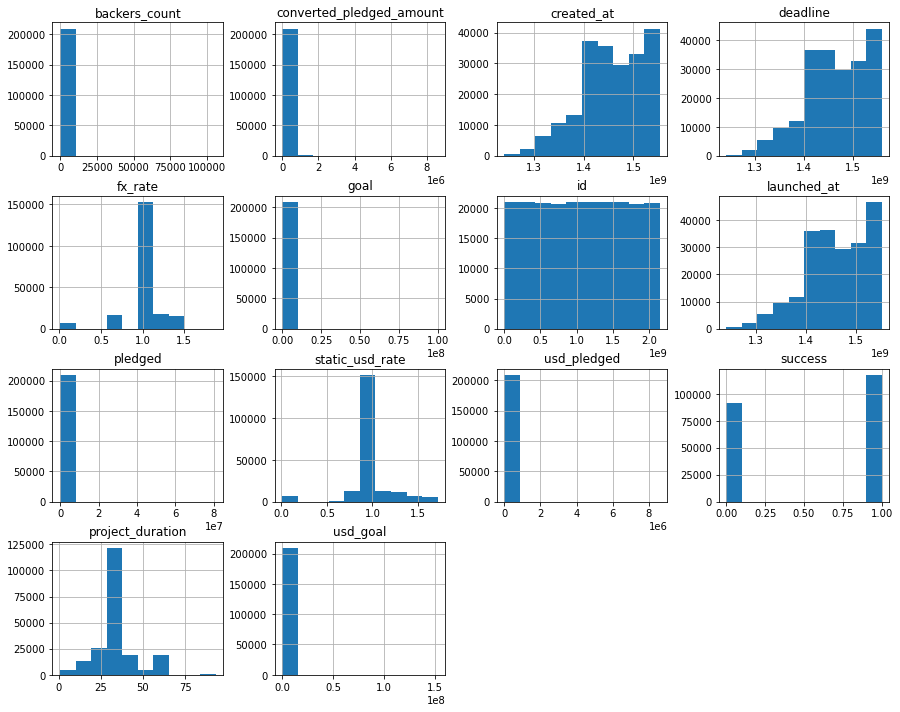

In [24]:
df.hist(figsize=(15, 12));

In [25]:
df.columns

Index(['backers_count', 'blurb', 'category', 'converted_pledged_amount',
       'country', 'created_at', 'deadline', 'fx_rate', 'goal', 'id',
       'launched_at', 'name', 'pledged', 'state', 'static_usd_rate',
       'usd_pledged', 'category_name', 'converted_deadline',
       'converted_launched_at', 'success', 'project_duration', 'usd_goal'],
      dtype='object')

In [26]:
#Drop further variables
df.drop(columns=['backers_count', 'converted_pledged_amount', 'pledged', 'usd_pledged',
                 'fx_rate', 'static_usd_rate', 'id', 'blurb', 'name', 'goal', 'state',
                 'deadline', 'launched_at', 'category'], inplace=True)

df.columns

Index(['country', 'created_at', 'category_name', 'converted_deadline',
       'converted_launched_at', 'success', 'project_duration', 'usd_goal'],
      dtype='object')

In [27]:
df.category_name.unique()

array(['Footwear', 'Playing Cards', 'Rock', 'Nonfiction',
       'Classical Music', 'Music', 'Immersive', 'Accessories',
       'Restaurants', 'Mixed Media', 'World Music', 'Experimental',
       'Spaces', 'Fine Art', 'Small Batch', 'Plays', 'Sculpture',
       'Photography', 'Fashion', 'Electronic Music', 'Software',
       'Apparel', 'Performance Art', 'Jewelry', 'Workshops', 'Theater',
       'Musical', 'Photobooks', 'Nature', 'Animals', 'Ready-to-wear',
       'Places', 'Country & Folk', 'People', 'Indie Rock',
       'Graphic Design', 'Narrative Film', 'Television', 'Wearables',
       'Performances', 'Sound', 'Video Art', 'Gadgets', 'Printing',
       'Anthologies', 'Art Books', 'DIY Electronics', 'Live Games',
       '3D Printing', 'Civic Design', 'Technology', 'Hardware',
       'Camera Equipment', 'Space Exploration', 'Web', 'Literary Spaces',
       'Apps', 'Robots', 'Fabrication Tools', 'Flight', 'Taxidermy',
       'Vegan', 'Pet Fashion', 'Poetry', 'Puzzles', 'Product Desig

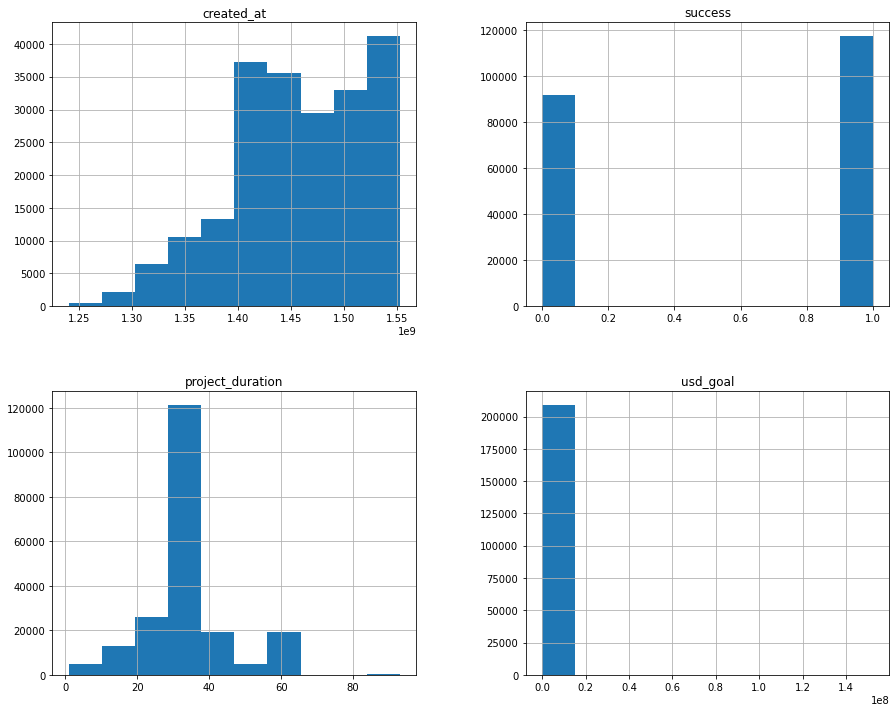

In [28]:
df.hist(figsize=(15, 12));

In [32]:
# Normalizing Numerical Features
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler()
numerical = ['success', 'created_at', 'project_duration', 'usd_goal']
df[numerical] = scaler.fit_transform(df[numerical])

# Show an example of a record with scaling applied
display(df.head(n = 3))

,country,created_at,category_name,converted_deadline,converted_launched_at,success,project_duration,usd_goal
0,US,0.964545,Footwear,2019-03-14 05:02:55,2019-01-23 06:02:55,0.0,0.521739,0.000184
1,US,0.837127,Playing Cards,2017-09-09 17:00:59,2017-08-10 17:00:59,1.0,0.315217,0.000007
2,US,0.347966,Rock,2013-06-12 05:03:15,2013-05-13 05:03:15,1.0,0.315217,0.000098


### EDA